## 程式說明  Portfolio Optimization with Python using Efficient Frontier with Practical Examples
  https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/ 


## 範例程式 https://ithelp.ithome.com.tw/articles/10249694


In [1]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Data
test = data.DataReader(['0050.TW','00679B.TWO'], 'yahoo', start='2017/01/11', end='2021/12/31')
test.head()

Attributes  Adj Close                 Close                  High             \
Symbols       0050.TW 00679B.TWO    0050.TW 00679B.TWO    0050.TW 00679B.TWO   
Date                                                                           
2017-01-11  72.400002  39.998798  72.400002  39.998798  72.849998  39.998798   
2017-01-12  73.150002  39.790501  73.150002  39.790501  73.300003  39.790501   
2017-01-13  72.599998  39.560101  72.599998  39.560101  72.800003  39.560101   
2017-01-16  72.000000        NaN  72.000000        NaN  72.400002        NaN   
2017-01-17  72.300003  39.689999  72.300003  39.689999  72.400002  39.779999   

Attributes        Low                  Open                Volume             
Symbols       0050.TW 00679B.TWO    0050.TW 00679B.TWO    0050.TW 00679B.TWO  
Date                                                                          
2017-01-11  72.400002  39.998798  72.800003  39.998798  1898053.0        0.0  
2017-01-12  72.599998  39.790501  72.599998  39.790501  4857459.0        0.0  
2017-01-13  72.599998  39.560101  72.800003  39.560101  3909860.0        0.0  
2017-01-16  71.800003        NaN  72.400002        NaN  2418439.0        NaN  
2017-01-17  72.000000  39.509998  72.000000  39.700001  1572741.0   928000.0

In [3]:
# Closing price
test = test['Adj Close']
test.head()

Symbols,0050.TW,00679B.TWO
Date,,
2017-01-11,72.400002,39.998798
2017-01-12,73.150002,39.790501
2017-01-13,72.599998,39.560101
2017-01-16,72.000000,NaN
2017-01-17,72.300003,39.689999


In [4]:
# Log of percentage change
etf_0050 = test['0050.TW'].pct_change().apply(lambda x: np.log(1+x))
etf_0050.head()

Date
2017-01-11         NaN
2017-01-12    0.010306
2017-01-13   -0.007547
2017-01-16   -0.008299
2017-01-17    0.004158
Name: 0050.TW, dtype: float64

In [5]:
# Variance
var_etf_0050 = etf_0050.var()
var_etf_0050

0.00011387110674204043

In [7]:
# Log of Percentage change for Facebook
etf_00679B = test['00679B.TWO'].pct_change().apply(lambda x: np.log(1+x))
etf_00679B.head()

Date
2017-01-11         NaN
2017-01-12   -0.005221
2017-01-13   -0.005807
2017-01-16    0.000000
2017-01-17    0.003278
Name: 00679B.TWO, dtype: float64

In [8]:
# Variance
var_etf_00679B = etf_00679B.var()
var_etf_00679B

7.289805817802401e-05

In [9]:
# Volatility
etf_0050_vol = np.sqrt(var_etf_0050 * 250)
etf_00679B_vol = np.sqrt(var_etf_00679B * 250)
etf_0050_vol, etf_00679B_vol

(0.1687239659488542, 0.13499820200471563)

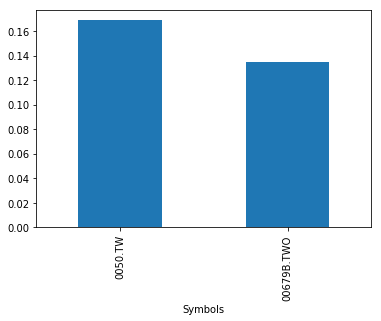

In [10]:
# Volatility of both stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

In [11]:
# Log of Percentage change
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

Symbols,0050.TW,00679B.TWO
Date,,
2017-01-11,NaN,NaN
2017-01-12,0.010306,-0.005221
2017-01-13,-0.007547,-0.005807
2017-01-16,-0.008299,0.000000
2017-01-17,0.004158,0.003278


In [12]:
# Covariance
test1['0050.TW'].cov(test1['00679B.TWO'])

-1.906106401383426e-05

In [13]:
# Correlation
test1['0050.TW'].corr(test1['00679B.TWO'])

-0.20920997571046213

In [14]:
# Expected Returns
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

Symbols,0050.TW,00679B.TWO
Date,,
2017-01-11,NaN,NaN
2017-01-12,0.010306,-0.005221
2017-01-13,-0.007547,-0.005807
2017-01-16,-0.008299,0.000000
2017-01-17,0.004158,0.003278


In [15]:
# Define weights for allocation
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind

Symbols
0050.TW       0.000576
00679B.TWO    0.000025
dtype: float64

In [16]:
# Total expected return
e_r = (e_r_ind*w).sum()
e_r

0.00013502748098413522

## 實戰

In [2]:
# Import data
df = data.DataReader(['0050.TW','0051.TW'], 'yahoo', start='2006/08/24', end='2021/12/31')
df.head()

Attributes  Adj Close                 Close                  High             \
Symbols       0050.TW    0051.TW    0050.TW    0051.TW    0050.TW    0051.TW   
Date                                                                           
2008-01-02  60.009998  33.139999  60.009998  33.139999  60.009998  33.139999   
2008-01-03  58.889999  32.549999  58.889999  32.549999  58.889999  32.549999   
2008-01-04  59.009998  32.730000  59.009998  32.730000  59.009998  32.730000   
2008-01-07  56.389999  31.250000  56.389999  31.250000  56.389999  31.250000   
2008-01-08  56.980000  31.389999  56.980000  31.389999  56.980000  31.389999   

Attributes        Low                  Open             Volume          
Symbols       0050.TW    0051.TW    0050.TW    0051.TW 0050.TW 0051.TW  
Date                                                                    
2008-01-02  60.009998  33.139999  60.009998  33.139999     0.0     0.0  
2008-01-03  58.889999  32.549999  58.889999  32.549999     0.0     0.0  
2008-01-04  59.009998  32.730000  59.009998  32.730000     0.0     0.0  
2008-01-07  56.389999  31.250000  56.389999  31.250000     0.0     0.0  
2008-01-08  56.980000  31.389999  56.980000  31.389999     0.0     0.0

In [3]:
# Closing price
df = df['Adj Close']
df.head()

Symbols,0050.TW,0051.TW
Date,,
2008-01-02,60.009998,33.139999
2008-01-03,58.889999,32.549999
2008-01-04,59.009998,32.730000
2008-01-07,56.389999,31.250000
2008-01-08,56.980000,31.389999


In [4]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,0050.TW,0051.TW
Symbols,,
0050.TW,0.000199,0.000123
0051.TW,0.000123,0.000195


In [5]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,0050.TW,0051.TW
Symbols,,
0050.TW,1.000000,0.625772
0051.TW,0.625772,1.000000


In [6]:
# Randomly weighted portfolio's variance
w = {'0050.TW': 0.1, '00679B.TWO': 0.9}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

1.9927871541776804e-06

In [7]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
0050.TW    0.138729
0051.TW    0.138310
dtype: float64

In [8]:
# Portfolio returns
w = [0.2, 0.8]
port_er = (w*ind_er).sum()
port_er

0.13839416664472357

In [9]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
0050.TW    0.223203
0051.TW    0.220870
dtype: float64

In [10]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
0050.TW,0.138729,0.223203
0051.TW,0.138310,0.220870


In [11]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [12]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [13]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [14]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,0050.TW weight,0051.TW weight
0,0.138524,0.200223,0.509736,0.490264
1,0.138594,0.203506,0.676966,0.323034
2,0.138446,0.202605,0.322970,0.677030
3,0.138498,0.200313,0.446755,0.553245
4,0.138672,0.212932,0.863920,0.136080


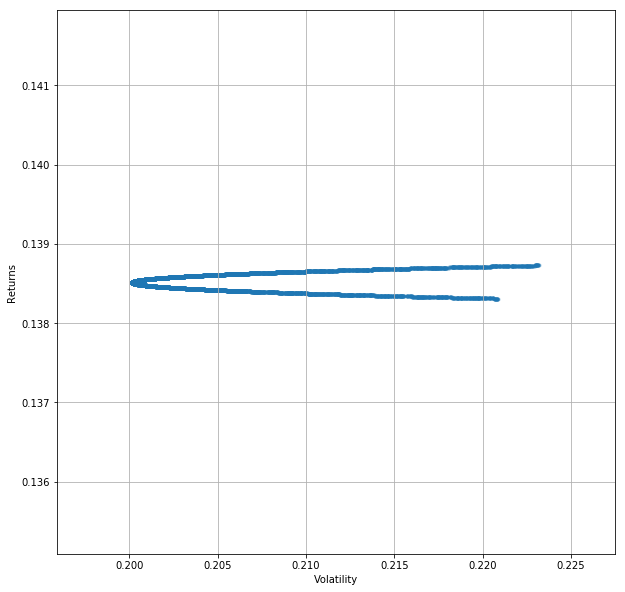

In [15]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [16]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns           0.138514
Volatility        0.200171
0050.TW weight    0.485972
0051.TW weight    0.514028
Name: 9348, dtype: float64

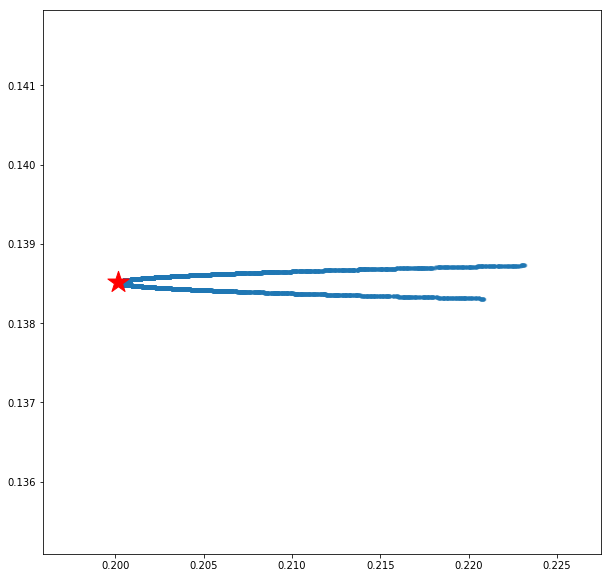

In [17]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [18]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns           0.138516
Volatility        0.200172
0050.TW weight    0.489629
0051.TW weight    0.510371
Name: 4098, dtype: float64

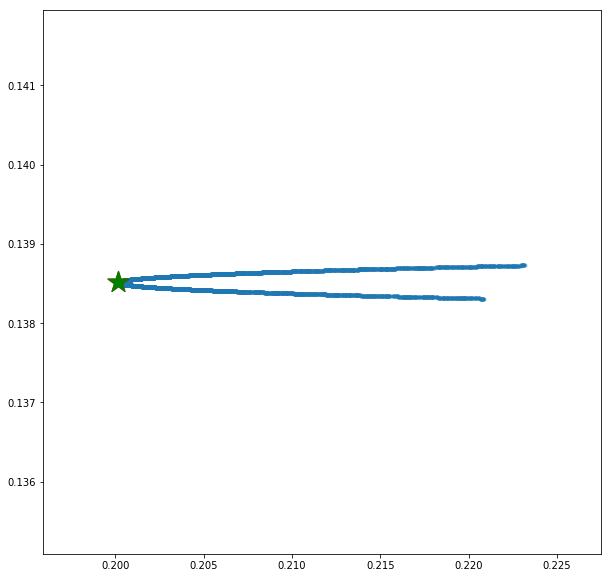

In [19]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [20]:
portfolios[portfolios['0050.TW weight']>0.8]

,Returns,Volatility,0050.TW weight,0051.TW weight
4,0.138672,0.212932,0.863920,0.136080
11,0.138662,0.211349,0.839011,0.160989
18,0.138654,0.210233,0.820478,0.179522
19,0.138680,0.214089,0.881227,0.118773
30,0.138714,0.220100,0.962358,0.037642
52,0.138688,0.215485,0.901280,0.098720
70,0.138654,0.210148,0.819024,0.180976
76,0.138668,0.212193,0.852478,0.147522
79,0.138722,0.221730,0.982425,0.017575
93,0.138658,0.210786,0.829767,0.170233


In [21]:
portfolios[(portfolios['0050.TW weight'] >0.2) & (portfolios['0050.TW weight'] <0.201)]

,Returns,Volatility,0050.TW weight,0051.TW weight
1972,0.138394,0.207550,0.200442,0.799558
3013,0.138394,0.207560,0.200228,0.799772
4276,0.138394,0.207561,0.200213,0.799787
9411,0.138394,0.207537,0.200698,0.799302
9921,0.138395,0.207522,0.200989,0.799011


In [22]:
portfolios['0050.TW weight'] <0.55

0        True
1       False
2        True
3        True
4       False
5       False
6        True
7       False
8       False
9       False
10       True
11      False
12       True
13       True
14       True
15       True
16       True
17       True
18      False
19      False
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
9970    False
9971     True
9972     True
9973     True
9974    False
9975    False
9976     True
9977     True
9978    False
9979     True
9980     True
9981    False
9982     True
9983     True
9984    False
9985     True
9986    False
9987    False
9988    False
9989     True
9990     True
9991     True
9992     True
9993     True
9994    False
9995     True
9996    False
9997    False
9998     True
9999     True
Name: 0050.TW weight, Length: 10000, dtype: bool